# 🛠️ Environment Setup & Dependencies

In this section, we initialize the environment by importing essential libraries for data manipulation, visualization, and machine learning. 

* **Pandas & NumPy**: For efficient data structures and numerical operations.
* **Matplotlib/Seaborn**: For generating insightful data visualizations.
* **Scikit-Learn**: For implementing our classification models.

In [6]:
# Standard library imports for data handling
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns # Added for professional-looking plots

# Scikit-Learn components for modeling
from sklearn.tree import DecisionTreeClassifier 

# Preprocessing and Evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## 📂 Data Acquisition & Initial Exploration

In this phase, we load the clinical dataset and perform an initial inspection to understand its structure, statistical distribution, and feature types. This helps in identifying any immediate patterns or anomalies in the medical records.

In [7]:
# Load the dataset
df = pd.read_csv("../data/heart.csv")

# Display the first 5 rows to understand the data format
print("--- Dataset Preview ---")
display(df.head())

--- Dataset Preview ---


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Summary of the dataframe (Types, Non-null counts)
print("\n--- Data Information ---")
df.info()


--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Statistical summary of numerical features
print("\n--- Statistical Summary ---")
display(df.describe())


--- Statistical Summary ---


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Check dimensions and column names
print(f"\nDataset Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")


Dataset Shape: (303, 14)
Features: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


## 🛠️ Feature & Label Extraction

To train our machine learning model, we must separate the dataset into:
1. **Feature Matrix (X)**: The independent variables (clinical metrics) that help predict heart disease.
2. **Target Vector (y)**: The dependent variable we want to predict (0 = Low Risk, 1 = High Risk).

We convert these into **NumPy arrays** to ensure compatibility with the Scikit-Learn framework.

In [11]:
# Extracting features (X) and target labels (y)
# We drop the 'output' column to get features, and select only 'output' for the target
X = df.drop('output', axis=1).values 
y = df['output'].values

# Displaying the first 5 rows of X and y to verify the structure
print("--- Features (X) Sample ---")
print(X[:5])

print("\n--- Target (y) Sample ---")
print(y[:5])

--- Features (X) Sample ---
[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]

--- Target (y) Sample ---
[1 1 1 1 1]


## 🧪 Splitting Dataset into Training and Testing Sets

To evaluate the model's performance on unseen data, we partition the dataset:
* **Training Set (80%)**: Used to teach the model patterns within the medical data.
* **Testing Set (20%)**: Used as a "final exam" to verify the model's accuracy.

We use `random_state=42` to ensure **reproducibility**, meaning we get the same split every time the code runs.

In [12]:
# Splitting the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Printing the shapes to verify the split
print(f"Data splitting successful!")
print(f"Total samples: {len(X)}")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X):.0%})")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X):.0%})")

Data splitting successful!
Total samples: 303
Training samples: 242 (80%)
Testing samples: 61 (20%)


## 🌲 Decision Tree Classification

In this stage, we initialize and train the **Decision Tree Classifier**. 
* **Criterion ('entropy')**: We use Information Gain (Entropy) to measure the quality of splits.
* **Max Depth (4)**: To prevent the model from overfitting the training data, we limit the depth of the tree. This ensures the model generalizes well to new, unseen patient data.

In [13]:
# Initialize the Decision Tree Classifier
# We set max_depth to 4 to maintain a balance between complexity and interpretability
heart_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Fit the model with training data
heart_tree.fit(X_train, y_train)

# Make predictions on the test set
pred_tree = heart_tree.predict(X_test)

# Comparative view: Predicted vs Actual values
print("--- Prediction Comparison (First 5 Samples) ---")
print(f"Predicted Labels: {pred_tree[:5]}")
print(f"Actual Labels:    {y_test[:5]}")

--- Prediction Comparison (First 5 Samples) ---
Predicted Labels: [0 1 1 0 1]
Actual Labels:    [0 0 1 0 1]


## ⚖️ Model Performance Evaluation

Now, we evaluate our **Decision Tree** model using the **Accuracy Score**. This metric represents the percentage of correct predictions out of the total testing samples. 

While accuracy is a great starting point, for medical data, we also look for a balance between **Precision** and **Recall** to ensure we aren't missing high-risk cases.

Model Accuracy: 88.52%
------------------------------
Detailed Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.87      0.90      0.88        29
   High Risk       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



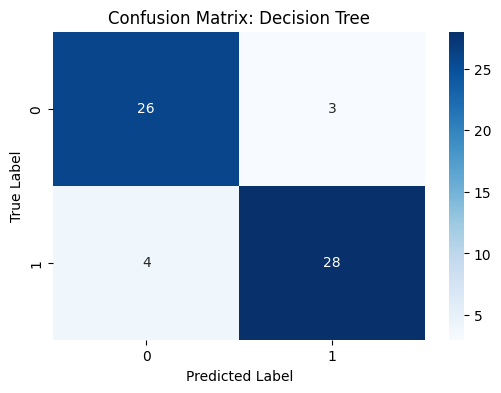

In [14]:
# Calculate accuracy
acc = accuracy_score(y_test, pred_tree)

print(f"Model Accuracy: {acc * 100:.2f}%")
print("-" * 30)

# Detailed Classification Report
print("Detailed Classification Report:")
print(classification_report(y_test, pred_tree, target_names=['Low Risk', 'High Risk']))

# Confusion Matrix for visual confirmation
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

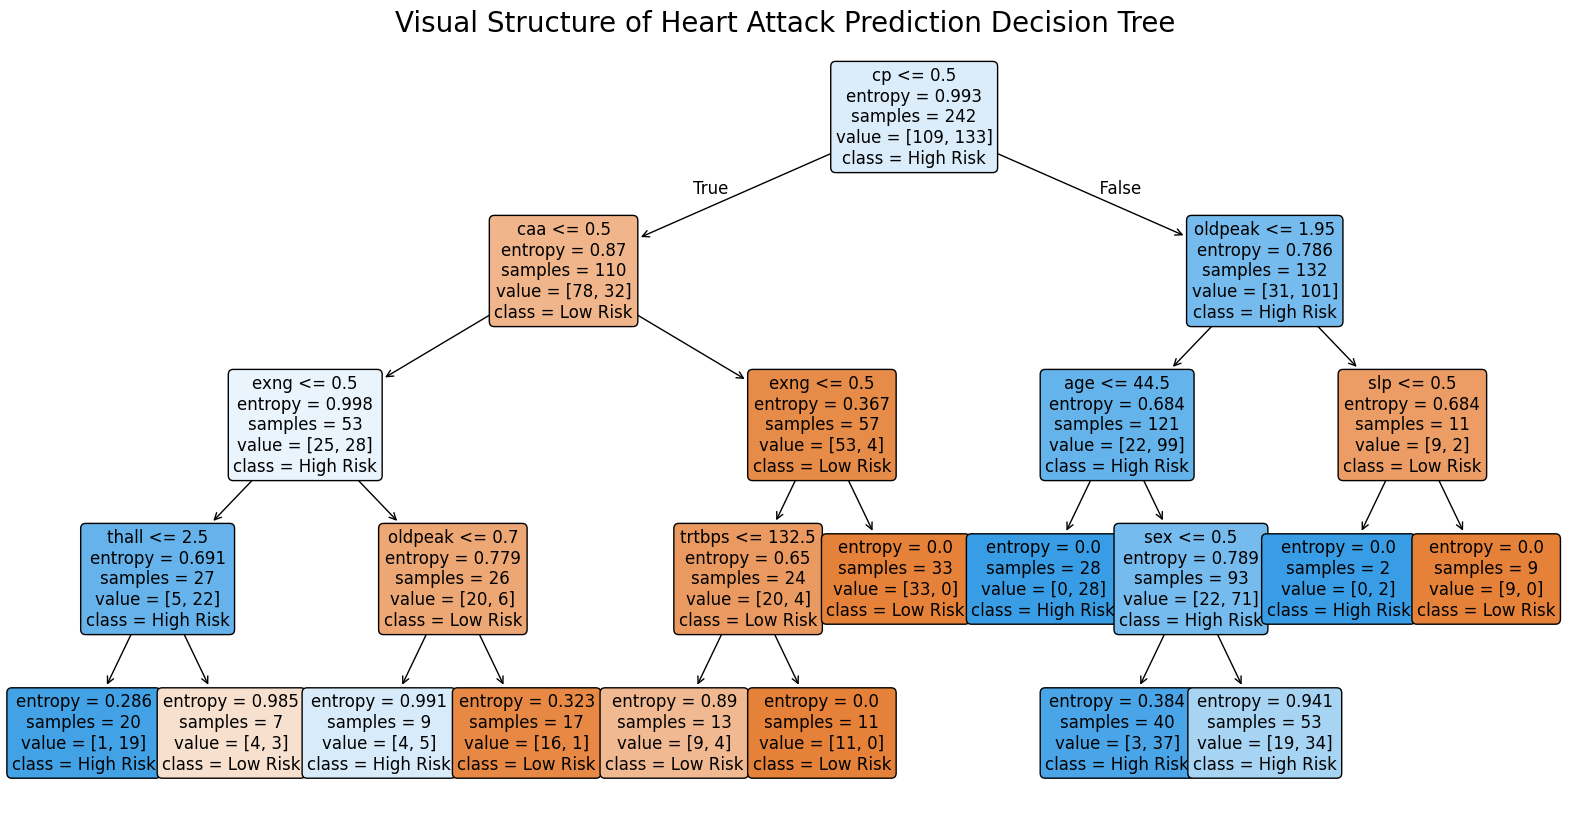

In [15]:
from sklearn import tree

# Feature names for better readability in the tree diagram
feature_names = df.drop('output', axis=1).columns.tolist()

# Setting up the figure size
plt.figure(figsize=(20, 10))

# Plotting the tree
tree.plot_tree(
    heart_tree, 
    feature_names=feature_names, 
    class_names=['Low Risk', 'High Risk'], 
    filled=True, 
    rounded=True, 
    fontsize=12
)

plt.title("Visual Structure of Heart Attack Prediction Decision Tree", fontsize=20)
plt.show()